## Preamble ##

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input/data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# Basic libraries
import numpy as np
import pandas as pd
from scipy import stats

# File related
import zipfile
from subprocess import check_output

# Machine Learning
# import sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, Ridge
# import tensorflow as tf

# Plotting with matplotlib
import matplotlib
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from pandas.plotting import andrews_curves
from pandas.plotting import radviz

plt.style.use('fivethirtyeight')

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 14

## Read data ##

In [2]:
from subprocess import check_output
print(check_output(['ls', '../input/']).decode('utf8'))

aircrafts.csv
occurrences.csv



In [3]:
aircrafts = pd.read_csv('../input/aircrafts.csv',
                        na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1'
                       )

# Exchange white spaces by underlines, in column names
aircrafts.columns = [c.replace(' ', '_') for c in aircrafts.columns]

# Scores for damage level
aircrafts.replace(
    to_replace=['UNKNOWN', 'NONE', 'LIGHT', 'SUBSTANTIAL', 'DESTROYED'],
    value=[np.nan, 0, 1, 2, 3],
    inplace=True
    )

# Drop all rows for which 'damage_level' & 'engines_amount' are NAN
aircrafts.dropna(axis=0,
                 how='any',
                 subset=['damage_level', 'engines_amount'],
                 inplace=True
                 )

aircrafts.head()

,Unnamed:_0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,NaN,INSTRUCTION,2.0,NaN,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,1.0,NaN,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,...,BRAZIL,TPX,AEROTAXI,NaN,NaN,RUN AFTER LANDING,AEROTAXI,2.0,NaN,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,...,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,1.0,NaN,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,...,BRAZIL,TPR,REGULAR,NaN,NaN,ASCENSION,REGULAR,0.0,NaN,2016-07-30


In [4]:
occurrences = pd.read_csv('../input/occurrences.csv',
                        na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1'
                       )

# Exchange white spaces by underlines, in column names
occurrences.columns = [c.replace(' ', '_') for c in occurrences.columns]

# Read year from 'occurrence_day' column. 
# Create a new column called 'occurrence_year'
occurrences['occurrence_year'] = pd.to_datetime(
                                    occurrences['occurrence_day'],
                                    format='%Y/%m/%d'
                                    ).dt.year

occurrences.head()

,Unnamed:_0,occurrence_id,classification,type_of_occurrence,localization,fu,country,aerodrome,occurrence_day,time,...,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day,occurrence_year
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,...,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2013
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,...,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30,2013
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,NaN,2008-08-07,15:10:00,...,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30,2008
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,NaN,2011-08-11,17:00:00,...,SERIPA-7,FINISHED,NaN,1.0,2012-09-20,4,1,NaN,2016-07-30,2011
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,NaN,2009-12-28,17:30:00,...,SERIPA-5,IN PROGRESS,UNDEFINED,NaN,NaN,0,1,NaN,2016-07-30,2009


In [5]:
# Classification

print(occurrences['classification'].unique())

['ACCIDENT' 'SERIOUS INCIDENT']


In [6]:
print('Total: ' +
      str(occurrences['classification'].count())
     )

print('SERIOUS INCIDENT: ' +
      str(occurrences['classification'][occurrences['classification'] == 'SERIOUS INCIDENT'].count())
     )

print('ACCIDENT: ' +
      str(occurrences['classification'][occurrences['classification'] == 'ACCIDENT'].count())
     )

Total: 2027
SERIOUS INCIDENT: 552
ACCIDENT: 1475


In [7]:
# Type of occurrences

print(occurrences['type_of_occurrence'].unique())

['ENGINE FAILURE DURING THE FLIGHT' 'LANDING WITHOUT LANDING GEAR'
 'LOSS OF CONTROL ON THE GROUND' 'SLOW LANDING'
 'LOSS OF CONTROL IN THE AIR' 'UNKNOWN' 'ABOUT LANDING GEAR'
 'TERRAIN COLLISION' 'TRACK INCURSION'
 'METEOROLOGICAL PHENOMENOM IN THE AIR' 'HARD LANDING' 'ANOTHER TYPES'
 'ABOUT ROTOR' 'SYSTEM / COMPONENT FAILURE'
 'COLLISION AGAINST OBSTACLE DURING THE FLIGHT'
 'ABOUT WINDOWS / DOORS / WINDSHIELD' 'LOSS OF COMPONENT DURING THE FLIGHT'
 'COLLISION AGAINST OBSTACLE ON THE GROUND' 'FIRE DURING THE FLIGHT'
 'LANDING BEFORE THE TRACK AREA' 'LOAD LAUNCH'
 'EXPLOSIVE / NOT INTENTIONAL DECOMPRESSION'
 'AIRCRAFTS COLLISION IN THE AIR' 'SPATIAL UNAWARENESS'
 'LANDING ON UNPREDICTABLE PLACE' 'TIRE BURST' 'FUEL STARVATION'
 'COMPONENT LOSS ON THE GROUND' 'ABOUT PROPELLER' 'LOW ALTITUDE MANEUVERS'
 'FIRE ON THE GROUND' 'VEHICLE COLLISION AGAINST AIRCRAFT'
 'FOD - DAMAGE CAUSED BY UNKNOWN OBJECT'
 'COLLISION DURING THE FLIGHT AGAINST TOWED OBJECT'
 'AIRCRAFT HIT BY OBJECT' 'METEOROLOG

## Data analysis ##

### [1] What was the frequency of each type of occurrence? ###

In [8]:
for occ in occurrences['type_of_occurrence'].unique():
    
    print(occ + ' :' +
          str(occurrences['type_of_occurrence'][
              occurrences['type_of_occurrence'] == occ
              ].count()
             )
         )

ENGINE FAILURE DURING THE FLIGHT :377
LANDING WITHOUT LANDING GEAR :54
LOSS OF CONTROL ON THE GROUND :325
SLOW LANDING :30
LOSS OF CONTROL IN THE AIR :310
UNKNOWN :57
ABOUT LANDING GEAR :130
TERRAIN COLLISION :21
TRACK INCURSION :1
METEOROLOGICAL PHENOMENOM IN THE AIR :27
HARD LANDING :40
ANOTHER TYPES :87
ABOUT ROTOR :3
SYSTEM / COMPONENT FAILURE :61
COLLISION AGAINST OBSTACLE DURING THE FLIGHT :142
ABOUT WINDOWS / DOORS / WINDSHIELD :5
LOSS OF COMPONENT DURING THE FLIGHT :27
COLLISION AGAINST OBSTACLE ON THE GROUND :40
FIRE DURING THE FLIGHT :8
LANDING BEFORE THE TRACK AREA :15
LOAD LAUNCH :1
EXPLOSIVE / NOT INTENTIONAL DECOMPRESSION :9
AIRCRAFTS COLLISION IN THE AIR :6
SPATIAL UNAWARENESS :10
LANDING ON UNPREDICTABLE PLACE :44
TIRE BURST :14
FUEL STARVATION :74
COMPONENT LOSS ON THE GROUND :6
ABOUT PROPELLER :11
LOW ALTITUDE MANEUVERS :16
FIRE ON THE GROUND :7
VEHICLE COLLISION AGAINST AIRCRAFT :1
FOD - DAMAGE CAUSED BY UNKNOWN OBJECT :1
COLLISION DURING THE FLIGHT AGAINST TOWED OBJ

In [9]:
# %%% Normalization %%%

occurrences_freq_dict = {}

for occ in occurrences['type_of_occurrence'].unique():
    
    occurrences_freq_dict[occ] = occurrences['type_of_occurrence'][
                                occurrences['type_of_occurrence'] == occ
                                ].count() / occurrences['type_of_occurrence'].count()
    
occurrences_freq = pd.Series(occurrences_freq_dict)

occurrences_freq.head(10)

ABOUT LANDING GEAR                         0.064134
ABOUT PASSENGERS/CREW DURING THE FLIGHT    0.000987
ABOUT PROPELLER                            0.005427
ABOUT ROTOR                                0.001480
ABOUT WINDOWS / DOORS / WINDSHIELD         0.002467
AIR TRAFFIC                                0.004933
AIRCRAFT HIT BY OBJECT                     0.000987
AIRCRAFTS COLLISION IN THE AIR             0.002960
AIRCRAFTS COLLISION ON THE GROUND          0.003947
ANOTHER TYPES                              0.042921
dtype: float64

### [2] What was the frequency on each state? ###

In [10]:
for occ in occurrences['fu'].unique():
    
    print(str(occ) + ' :' +
          str(occurrences['fu'][
              occurrences['fu'] == occ
              ].count()
             )
         )

RO :14
RR :25
RS :169
GO :141
RJ :120
ES :16
AL :12
DF :30
AC :14
MT :153
AM :81
PI :20
MS :72
SP :434
MA :40
AP :6
PA :119
SE :7
PR :154
CE :25
BA :83
MG :152
PE :29
RN :7
PB :6
SC :58
TO :30
nan :0
EX :8


In [11]:
# %%% Normalization %%%

states_freq_dict = {}

for occ in occurrences['fu'].unique():
    
    states_freq_dict[occ] = occurrences['fu'][
                                occurrences['fu'] == occ
                                ].count() / occurrences['fu'].count()
    
states_freq = pd.Series(states_freq_dict)

states_freq.head(10)

RO    0.006914
RR    0.012346
RS    0.083457
GO    0.069630
RJ    0.059259
ES    0.007901
AL    0.005926
DF    0.014815
AC    0.006914
MT    0.075556
dtype: float64

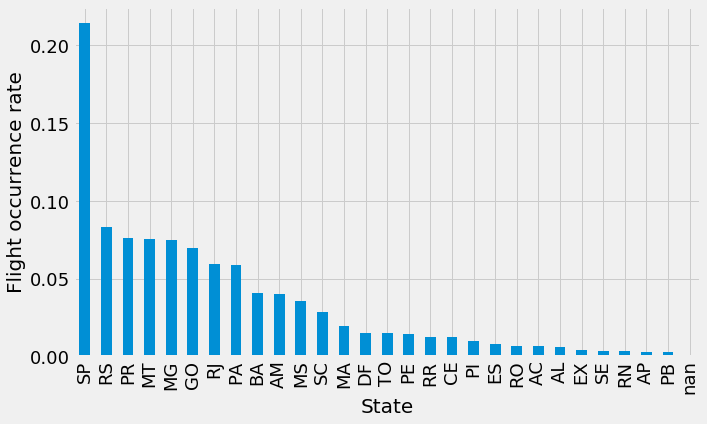

In [12]:
fig, axes = plt.subplots(figsize=(10.,6.))

states_freq.sort_values(ascending=False).plot(kind='bar')

axes.set_xlabel('State')
axes.set_ylabel('Flight occurrence rate')
                   
plt.show()
plt.close()

### [3] Evolution through the years ###

In [13]:
year_freq_dict = { }
year_freq_dict['all'] = {}

for s in occurrences['fu'].unique():
    year_freq_dict[s] = {}

for occ in occurrences['occurrence_year'].unique():
    
    year_freq_dict['all'][occ] = occurrences['occurrence_year'][
                                    occurrences['occurrence_year'] == occ
                                    ].count()

    for s in occurrences['fu'].unique():
        
        year_freq_dict[s][occ] = occurrences['occurrence_year'][
                                        (occurrences['occurrence_year'] == occ) &
                                        (occurrences['fu'] == s)
                                        ].count()

year_freq = pd.DataFrame(year_freq_dict)

year_freq.head()

,all,RO,RR,RS,GO,RJ,ES,AL,DF,AC,...,CE,BA,MG,PE,RN,PB,SC,TO,nan,EX
2006,117,1,2,11,7,7,3,2,4,0,...,1,1,6,1,1,0,5,0,0,2
2007,126,0,1,6,6,6,2,2,1,2,...,3,10,8,3,1,0,2,5,0,2
2008,148,1,2,18,3,14,0,1,4,3,...,1,7,4,3,0,0,2,3,0,2
2009,156,1,0,14,12,9,2,2,1,0,...,2,5,14,0,0,0,7,2,0,1
2010,194,1,5,16,15,13,0,2,4,1,...,2,10,13,5,0,0,5,5,0,0


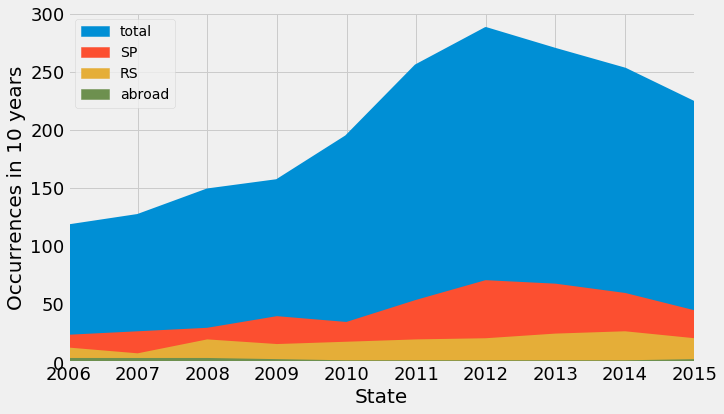

In [14]:
fig, axes = plt.subplots(figsize=(10.,6.))

year_freq['all'].plot.area(label='total')
year_freq['SP'].plot.area(label='SP')
year_freq['RS'].plot.area(label='RS')
year_freq['EX'].plot.area(label='abroad')

axes.set_xlabel('State')
axes.set_ylabel('Occurrences in 10 years')
          
axes.legend(loc='upper left')

plt.show()
plt.close()

### [4] Dependence with aircraft manufacturing dates ###

In [15]:
manuf_year_freq_dict = {}

manuf_year_lst = aircrafts['year_manufacture'].unique()

# Exclude 'nan' and '0'
manuf_year_lst = manuf_year_lst[~np.isnan(manuf_year_lst)]
manuf_year_lst[ manuf_year_lst != 0.]

for y in manuf_year_lst:
    
    manuf_year_freq_dict[y] = aircrafts['year_manufacture'][
                                        aircrafts['year_manufacture'] == y
                                        ].count()
    
manuf_year_freq = pd.Series(manuf_year_freq_dict)

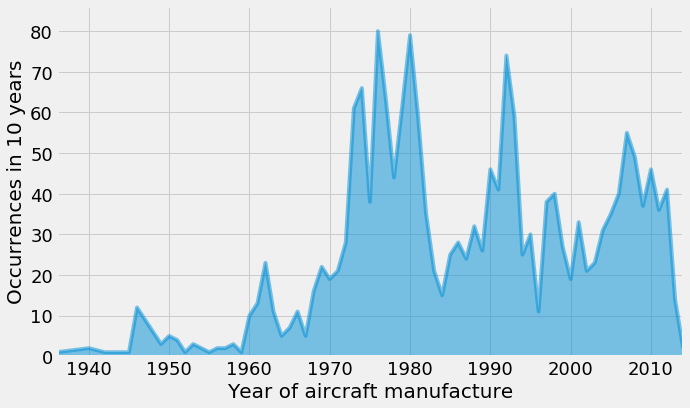

In [16]:
fig, axes = plt.subplots(figsize=(10.,6.))

manuf_year_freq.plot.area(alpha=0.5)

axes.set_xlabel('Year of aircraft manufacture')
axes.set_ylabel('Occurrences in 10 years')
axes.set_xlim(xmin=1936) 

plt.show()
plt.close()

### [5] Correlations ###

Good candidates for "features" determining the value of  `damage_level` are: 

`engines_amount`,
`seatings_amount`,
`takeoff_max_weight_(Lbs)`, and
 `year_manufacture`

Let's investigate how they correlate to `damage_level`.

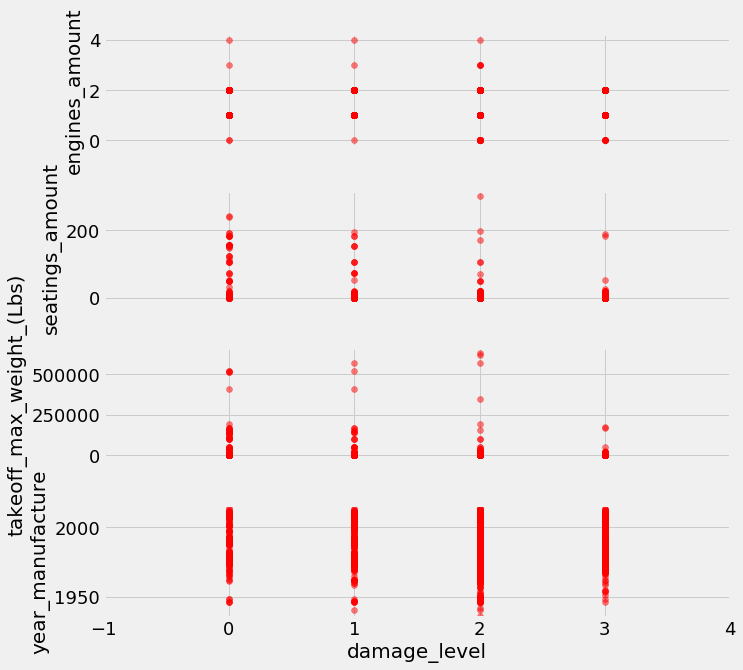

In [17]:
label_lst = ['damage_level',
             'engines_amount',
             'seatings_amount',
             'takeoff_max_weight_(Lbs)',
             'year_manufacture'
            ]

fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(10.,10.))
plt.subplots_adjust(hspace=0.4)

for j in range(1, len(label_lst)):
  
    axes[j-1].scatter(
                aircrafts[label_lst[0]],
                aircrafts[label_lst[j]],
                color='red',
                alpha=0.5
                )
    
    axes[j-1].set_ylabel(label_lst[j])

axes[0].set_xlim([-1.,4.])
axes[3].set_ylim([1935, 2016])

axes[3].set_xlabel(label_lst[0])

plt.show()
plt.close()

Not very obvious, huh? The only correlation visible to the naked eye is the negative correlation (downward slope) between `takeoff_max_weight` and `damage_level`.

To really understand correlations, we need to compute the **Pearson correlation coefficients** and build a full **correlation matrix**.

References: 

 1. [Pearson correlation coefficient from Wikipedia][1]
    
   
 2. [Correlation Coefficient from Wolfram MathWorld][2]

  [1]: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
  [2]: http://mathworld.wolfram.com/CorrelationCoefficient.html

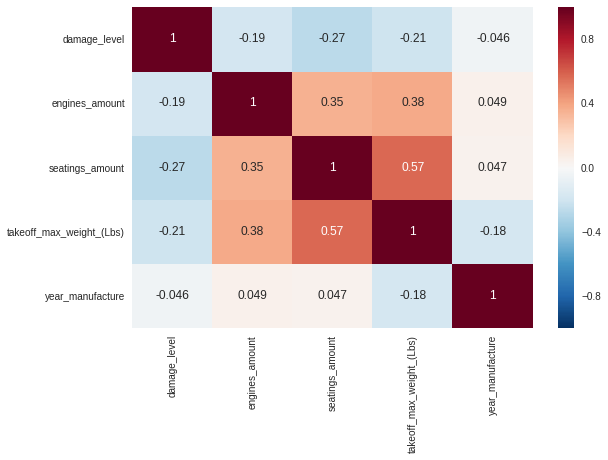

In [18]:
def plot_heatmap(df):
    
    import seaborn as sns
    
    fig, axes = plt.subplots()

    sns.heatmap(df, annot=True)

    plt.xticks(rotation=90)
    
    plt.show()
    plt.close()
    
plot_heatmap(aircrafts[label_lst].corr(method='pearson'))

**Conclusions:**

**Very weak correlations (abs(corr) < 0.1):**

 - Newer aircrafts are bigger (more engines and seatings).

 - Newer aircrafts had less damage.

The reason for the last item may be the evolution of safety systems and procedures.

**Weak correlations (0.1 < abs(corr) < 0.3):**

 - Light and small aircrafts had more damage.

Hence, size and weight features contribute more to damage levels than aircraft age.
 
**Mild correlations (0.3 < abs(corr) < 0.7):**

 - Between parameters related to size and weight: `engines_amount`,  `seatings_amount`, and `takeoff_max_weight`. They are all positively correlated.

**Strong correlations (0.7 < abs(corr) < 0.9):** none.

**Very strong correlations (abs(corr) > 0.9):** only self-correlations (diagonal).

### [6] Investigating clusterization ###

What I mean by that title is: are the various events in the dataset positioned in specific regions of the parameter space?

### [6.1] Parallel coordinates plot ###

"Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together".

References: 

 1. [Parallel coordinates, Pandas documentation][1]
 2. [Parallel coordinates, Wikipedia][2]


  [1]: http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#parallel-coordinates
  [2]: https://en.wikipedia.org/wiki/Parallel_coordinates

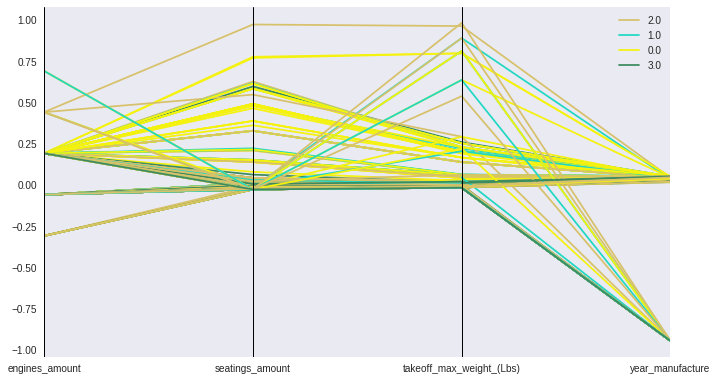

In [19]:
# Feature scaling, or normalization
def z_score_norm(df, feat):
    
    dff = df.copy(deep=True)
    
    dff[feat] = (
                df[feat] - df[feat].mean()
                ) / (
                    df[feat].max() - df[feat].min()
                    )
    
    return dff

aircrafts_norm = z_score_norm(aircrafts[label_lst], label_lst[1:])

fig, axes = plt.subplots(figsize=(10.,6.))

parallel_coordinates(aircrafts_norm, 'damage_level')

plt.show()
plt.close()

### [6.2] Andrews plot ###

"Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures".

References:

 1. [Andrews curves, Pandas documentation][1]
   
 2.  [Andrews plot, Wikipedia][2]

  [1]: http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#andrews-curves
  [2]: https://en.wikipedia.org/wiki/Andrews_plot

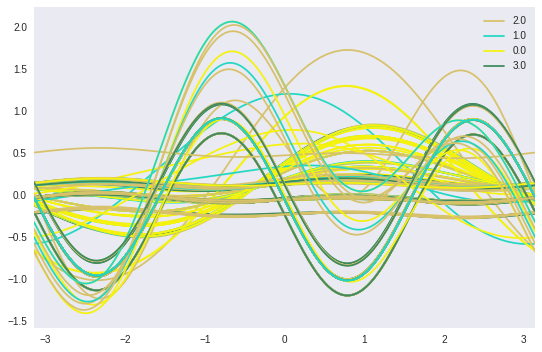

In [20]:
andrews_curves(aircrafts_norm, 'damage_level')

That's an awesome plot: while in the parallel coordinates plot (6.1) it was impossible to see any pattern, here we verify that 1 ('NONE') and 3 ('DESTROYED') are clustered at some level almost "everywhere".

### [6.3] RadViz plot ###

"RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently".

Reference: [RadViz, Pandas documentation][1]

  [1]: http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#radviz

/opt/conda/lib/python3.6/site-packages/pandas/tools/plotting.py:500: RuntimeWarning: invalid value encountered in true_divide
  y = (s * row_).sum(axis=0) / row.sum()


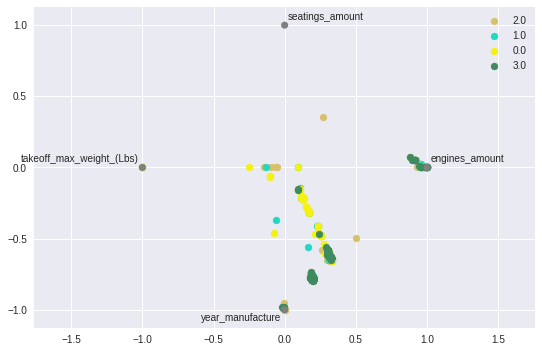

In [21]:
radviz(aircrafts_norm, 'damage_level')

Remarks:

 1. The Radviz plot is consistent with 1 ('NONE') and 3 ('DESTROYED')
    being generally clustered, as in the Andrews plot (6.2).

 2. Most points are opposite to `takeoff_max_weight_(Lbs)` and on the `engines_amount` side.  
    
 3. Most points are opposite to `seatings_amount` and on the `year_manufacture` side, but too much spread on this axis.

Therefore, `engines_amount` and `takeoff_max_weight_(Lbs)` seems to be the most reliable features to characterize `damage_level`.